# Vectorization Lab
All  of  the  programming  assignments  are  to  be  done  in  Python  using  additional  libraries  specified  in  the  assignments.  There  are many  libraries  available,  some  of  which  we  will  be  using,  and  you  are  welcome  to  use  them  with  one  exception:  if  the  library  or  a  function  within  it  performs  the  specific  function  you  are  asked  to  code,  you  may  not  use  that  other  than  perhaps  as  a  reference  to  compare  against. All  of  the  code  you  submit  must  be  your  own. You are welcome to turn in a completed jupyter notebook.

**The purpose of this lab is to learn how to use the vectorization features of Numpy. You are not allowed to use a for or while loop for any part of this lab. Any use of a for or while loop will cost points.**

The following code will load the grayscale image you can use for this lab. If needed, make sure to install PIL using *pip install PIL* or *conda install PIL*.

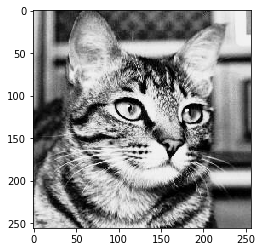

In [102]:
from scipy.ndimage import imread
import matplotlib.pyplot as plt
import numpy as np

cat = imread('cat.jpg')
cat = np.matrix(cat,dtype=np.int32)
plt.imshow(cat,cmap="Greys_r", vmin=0)
plt.show()

Implement each of the following functions.

## Function 1: Brightness Adjust
Takes in a grayscale image and returns the brightened version of that image according to a passed in parameter. Use a max image value of 255.

In [103]:
def brightAdjust(image, c):
    #print "before ", image
    temp=np.copy(image)
    temp+=c
    #image =np.matrix.clip(image, 0, 255)   This is already done below
    return temp



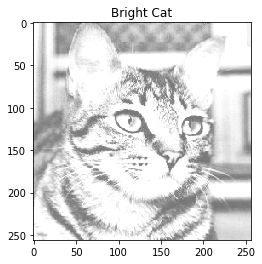

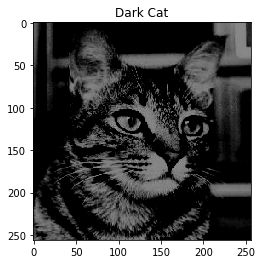

In [104]:
#Test Cases
bright_cat = brightAdjust(cat, 100)
plt.imshow(bright_cat, cmap="Greys_r",vmin=0, vmax=255);plt.title("Bright Cat");plt.show()
dark_cat = brightAdjust(cat, -100)
plt.imshow(dark_cat, cmap="Greys_r",vmin=0, vmax=255);plt.title("Dark Cat");plt.show()

## Function 2: Contrast Adjustment
Takes in a grayscale image and returns the contrasted version of that image according to a passed in parameter. Use a max image value of 255.

Also, rather than a straight linear operation, we will use a mapping similar to what Photoshop does. In particular, the contrast will be in the range [-100,100] where 0 denotes no change, -100 denotes complete loss of contrast, and 100 denotes maximum enhancement (8x multiplier). If *c* is the contrast parameter, then the level operation applied is:

$$s = \left(\frac{c+100}{100}\right)^4 (r-128) + 128$$

Make sure you work in floating point, not integers. Integer division would not be very acurate.

In [105]:

def contrastAdjust(image,c):
    #print "before ", image
    temp=np.copy(image)
    temp=(((c+100.0)/100.0)*((c+100.0)/100.0)*((c+100.0)/100.0)*((c+100.0)/100.0))*(temp-128.0)+128.0
    #image=np.matrix.clip(image, 0,255) again this is already done below
    return temp



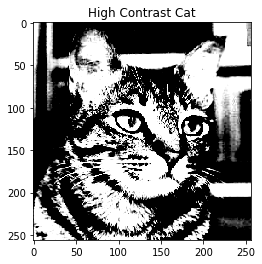

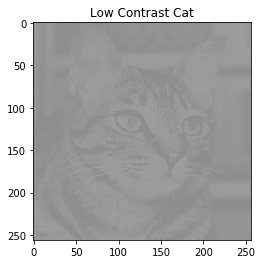

In [106]:
#Test Cases
high_contrast_cat = contrastAdjust(cat, 50)
plt.imshow(high_contrast_cat, cmap="Greys_r",vmin=0, vmax=255);plt.title("High Contrast Cat");plt.show()
low_contrast_cat = contrastAdjust(cat, -50)
plt.imshow(low_contrast_cat, cmap="Greys_r",vmin=0, vmax=255);plt.title("Low Contrast Cat");plt.show()

## Function 3: Thresholding
Takes in a grayscale image and returns the thresholded version of the image according to a passed in parameter. Ever pixel that is higher than the parameter is 255, everything below is zero. (Hint: Use np.where)

In [107]:
def thresholder(image, c):
    
    temp=np.copy(image)
    temp[np.where(temp>c)]=255   # I wasn't sure on equal case so I just made it 0 if its equal
    temp[np.where(temp<=c)]=0
    return temp


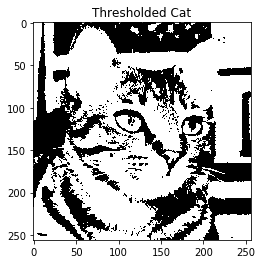

In [108]:
#Test Cases
thresholded_cat = thresholder(cat, 80)
plt.imshow(thresholded_cat, cmap="Greys_r",vmin=0, vmax=255);plt.title("Thresholded Cat");plt.show()

## Function 4: Cropping
Takes in a grayscale image, an x and y of a topleft pixel, a width, and a height and returns a cropped version of that image according to those parameters.

In [109]:
def cropper(image, width, height, x=0, y=0):
    temp=np.copy(image)
    return temp[x:x+width,y:y+height]



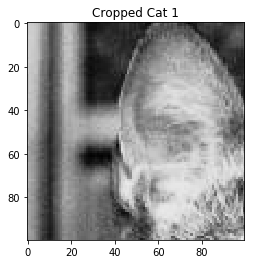

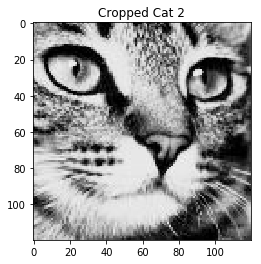

In [110]:
#Test Cases
cropped_cat1 = cropper(cat, 100, 100)
plt.imshow(cropped_cat1, cmap="Greys_r",vmin=0, vmax=255);plt.title("Cropped Cat 1");plt.show()
cropped_cat2 = cropper(cat, 120, 120, 90, 90)
plt.imshow(cropped_cat2, cmap="Greys_r",vmin=0, vmax=255);plt.title("Cropped Cat 2");plt.show()

## Function 5: Scaling
Takes in a grayscale image and returns the same image with a resolution that is half the width and half the height of the original. (Hint: Think about what pixels you will want to grab to make that smaller image)

In [111]:
def scaler(image):
    test=np.asmatrix((image.shape[0]/2, image.shape[1]/2))
    test=(image[1::2, 1::2]+image[0::2, 0::2])/2  #I averaged it to make it more accurate not every other one which is not accurate. 
    return test



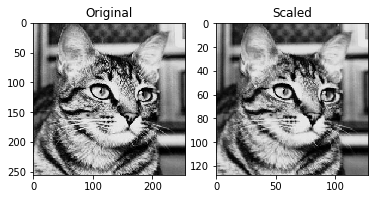

In [112]:
scaled_cat = scaler(cat)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(cat, cmap="Greys_r",vmin=0, vmax=255); ax1.set_title("Original")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(scaled_cat, cmap="Greys_r",vmin=0, vmax=255); ax2.set_title("Scaled")
plt.show()